In [1]:
import numpy as np
import scipy.sparse as sps
import porepy as pp
import math
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("./class")
from Flow_class import Flow

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:241: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim3d(z)


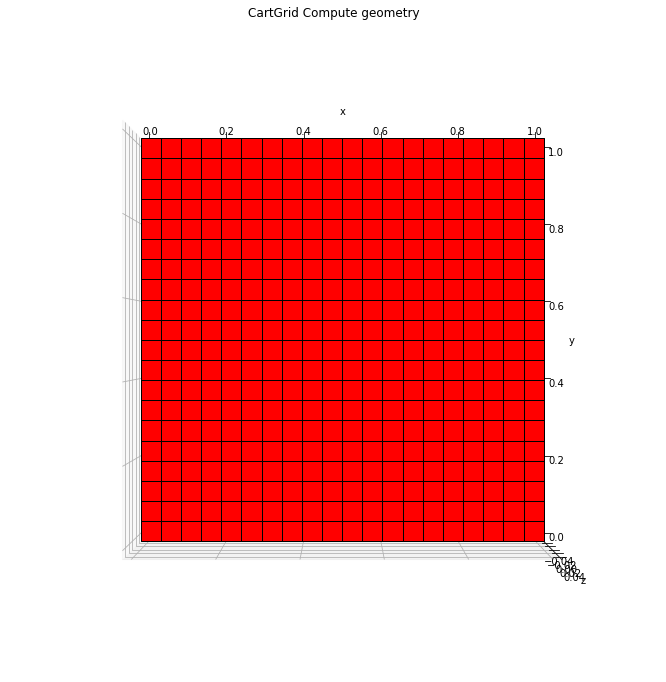

In [3]:
Nx=20
Ny=20
phys_dims=[1,1]
g=pp.CartGrid([Nx,Ny],phys_dims)
g.compute_geometry()
pp.plot_grid(g,figsize=(15,12))

In [4]:

b_faces = g.tags["domain_boundary_faces"].nonzero()[0]
print(b_faces)
#print(b_faces.size)
#print(g.num_faces)


[  0  20  21  41  42  62  63  83  84 104 105 125 126 146 147 167 168 188
 189 209 210 230 231 251 252 272 273 293 294 314 315 335 336 356 357 377
 378 398 399 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 820 821 822 823 824 825 826 827 828 829 830 831
 832 833 834 835 836 837 838 839]


In [5]:
# Permeability
perm = pp.SecondOrderTensor(np.ones(g.num_cells))                     
#f_lambda= lambda x,y,z: math.sin(4*math.pi*x)
f_lambda=lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y)

bc_lambda=lambda x,y,z:math.sin(math.pi*x)*math.sin(math.pi*y)

# Collect all parameters in a dictionary
parameters = {"second_order_tensor": perm, "f_lambda": f_lambda, "bc_lambda": bc_lambda}

In [6]:
flow=Flow(g,parameters,"MVEM")
flow.set_bc()
flow.set_source()
#f=g.cell_volumes
#flow.data[pp.PARAMETERS]["flow"]["source"]=f
#print(flow.data[pp.PARAMETERS]["flow"])
p=flow.solve()
print(p.size)

MVEM
400


In [7]:
print(flow.data)

{'discretization_matrices': {'flow': {'mass': <840x840 sparse matrix of type '<class 'numpy.float64'>'
	with 6400 stored elements in COOrdinate format>, 'div': <400x840 sparse matrix of type '<class 'numpy.float64'>'
	with 1600 stored elements in Compressed Sparse Row format>, 'vector_proj': <1200x840 sparse matrix of type '<class 'numpy.float64'>'
	with 4800 stored elements in COOrdinate format>, 'source': <1240x1240 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>}}, 'parameters': Data object for physical processes flow
The keyword "flow" has the following parameters specified: second_order_tensor, bc, bc_values, source}


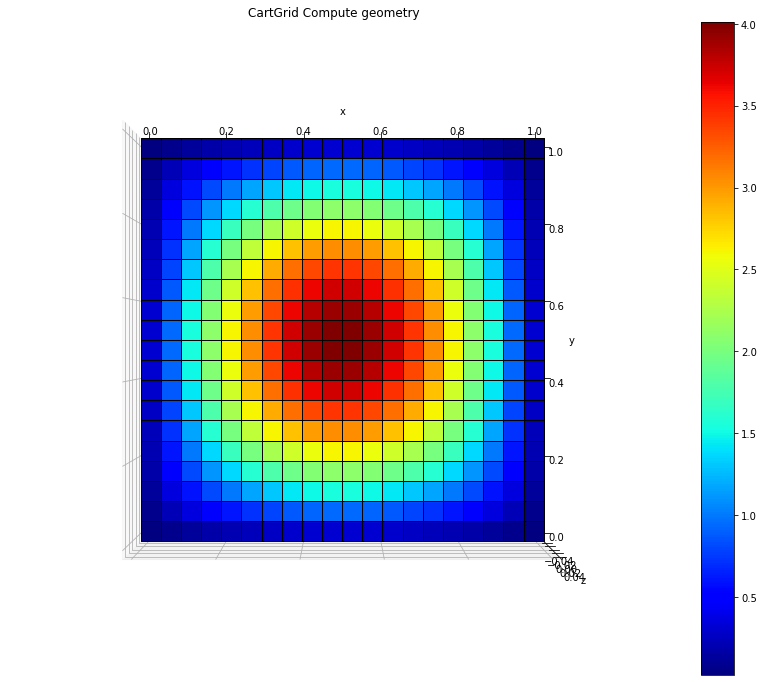

In [8]:
pp.plot_grid(g, p, figsize=(15, 12))

